Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

 

Example 1:

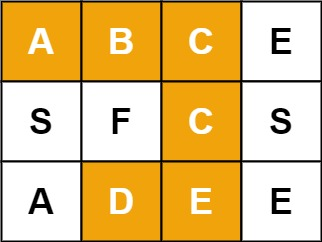

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"
Output: true

Example 2:

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "SEE"
Output: true

Example 3:

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCB"
Output: false

 

Constraints:

    m == board.length
    n = board[i].length
    1 <= m, n <= 6
    1 <= word.length <= 15
    board and word consists of only lowercase and uppercase English letters.

 

Follow up: Could you use search pruning to make your solution faster with a larger board?


In [16]:
from typing import List

class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        self.board = board
        self.exists = False
        self.max_i = len(board)
        self.max_j = len(board[0])
        
        def dfs(i, j, word, track):
            if len(word) == 0:
                self.exists = True
                return
            
            if (word[0] != self.board[i][j]) or self.exists or ((i, j) in track):
                return 
            
            if word[0] == self.board[i][j]:
                word = word[1:]
                if len(word) == 0:
                    self.exists = True
                    return
                
                track = track.copy()
                track.append((i, j))
                if i - 1 >= 0:
                    dfs(i - 1, j, word, track)
                if i + 1 < self.max_i:
                    dfs(i + 1, j, word, track)
                if j - 1 >= 0:
                    dfs(i, j - 1, word, track)
                if j + 1 < self.max_j:
                    dfs(i, j + 1, word, track)
                
            else:
                return
        
        for i in range(self.max_i):
            for j in range(self.max_j):
                dfs(i, j, word, [])
                if self.exists:
                    return True
        
        return False

In [17]:
s = Solution()
s.exist(board=[["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word="ABCCED")

True

In [18]:
s.exist(board=[["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word="ABCB")

False